In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('spy_tlt_gld.csv')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=False)
data.set_index('Date', inplace=True)

data.drop({'GLD'}, axis=1, inplace=True)


In [47]:
data.head()

,SPY,TLT
Date,,
2007-01-03,106.930310,57.971245
2007-01-04,107.157234,58.322742
2007-01-05,106.302510,58.075394
2007-01-08,106.794174,58.173035
2007-01-09,106.703410,58.173035


In [48]:
roll_days = 22

data_pct = data.pct_change(roll_days)
data_pct.dropna(how='any', inplace=True)


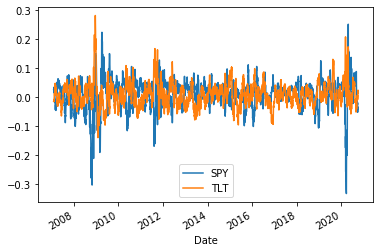

In [49]:
data_pct.plot()

In [78]:
# How often does SPY "win" over 1 year timeframe
spy_win = data_pct['SPY'][data_pct['SPY'] >= 0]
spy_win_freq = len(spy_win) / len(data_pct)

# How often does SPY "lose" over 1 year timeframe
spy_loss = data_pct['SPY'][data_pct['SPY'] < 0]
spy_loss_freq = len(spy_loss) / len(data_pct)


spy_win_freq, spy_loss_freq

(0.6670543762721721, 0.3329456237278279)

In [68]:
# How often does TLT "win" over 1 year timeframe
tlt_win = data_pct['TLT'][data_pct['TLT'] >= 0]

# How often does TLT "lose" over a 1 year timeframe
tlt_loss = data_pct['TLT'][data_pct['TLT'] < 0]

(len(tlt_win) / len(data_pct)), (len(tlt_loss) / len(data_pct))

(0.5644082582145973, 0.4355917417854027)

In [80]:
spy_win_eval = stats.gmean(spy_win + 1)
spy_loss_eval = stats.gmean(spy_loss + 1)

spy_win_eval, spy_loss_eval

(1.034116886634668, 0.9556288320259089)

In [82]:
total_win = spy_win_freq * spy_win_eval


total_loss = spy_loss_freq * spy_loss_eval

total_win, total_loss

(0.6898121948066089, 0.31817243753116187)

In [84]:
spy_eval = stats.gmean(data_pct['SPY'] + 1)

spy_eval

1.0072937182701633